This file was used to generate the results for all embeddings, weights and baselines for the given dataset.

In [1]:
import json

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
import umap

import networkx as nx
from interactive_layout import InteractiveLayout, get_crossings, get_occlusions

In [2]:
edges=pd.read_csv('./Data/webk/out1_graph_edges.txt', sep="\t", header=0, names=["source", "target"])
edges["weight"] = 1

nodes=pd.read_csv('./Data/webk/out1_node_feature_label.txt', sep="\t", header=0, names=["id", "feature", "label"])

feature_names = []
order_columns = ["id"]
for i in range(1703):
    feature_names.append("f" + str(i))
    order_columns.append("f" + str(i))
    
order_columns.append("label")
nodes[feature_names] = nodes['feature'].str.split(',', expand=True)

nodes = nodes.drop(columns=['feature'])

C:\Users\eness\AppData\Local\Temp\ipykernel_10204\2404510291.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nodes[feature_names] = nodes['feature'].str.split(',', expand=True)
C:\Users\eness\AppData\Local\Temp\ipykernel_10204\2404510291.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nodes[feature_names] = nodes['feature'].str.split(',', expand=True)
C:\Users\eness\AppData\Local\Temp\ipykernel_10204\2404510291.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inse

C:\Users\eness\AppData\Local\Temp\ipykernel_10204\2404510291.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nodes[feature_names] = nodes['feature'].str.split(',', expand=True)
C:\Users\eness\AppData\Local\Temp\ipykernel_10204\2404510291.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nodes[feature_names] = nodes['feature'].str.split(',', expand=True)
C:\Users\eness\AppData\Local\Temp\ipykernel_10204\2404510291.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inse

C:\Users\eness\AppData\Local\Temp\ipykernel_10204\2404510291.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nodes[feature_names] = nodes['feature'].str.split(',', expand=True)
C:\Users\eness\AppData\Local\Temp\ipykernel_10204\2404510291.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nodes[feature_names] = nodes['feature'].str.split(',', expand=True)
C:\Users\eness\AppData\Local\Temp\ipykernel_10204\2404510291.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inse

# TSNE

In [5]:
tsne_layout = InteractiveLayout(nodes = nodes, edges = edges, method="TSNE")

In [10]:
tsne_layout.draw()

interactive(children=(IntSlider(value=50, description='x', max=99), Output()), _dom_classes=('widget-interact'…

<function interactive_layout.InteractiveLayout.draw.<locals>.f(x)>

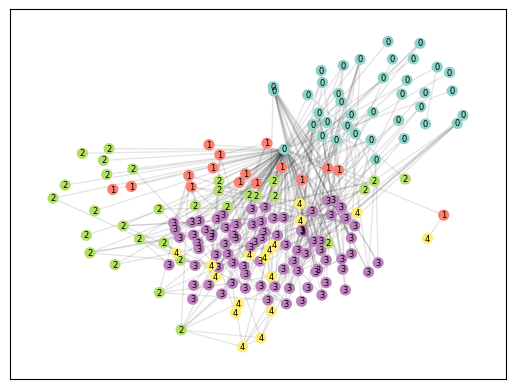

In [16]:
labels = dict(zip(tsne_layout.nodes['id'], tsne_layout.nodes['label']))

w=10
nx.draw_networkx_nodes(tsne_layout.graph, pos=tsne_layout.positions[w], node_size=50, 
                       node_color=tsne_layout.nodes['label'], cmap='Set3')
nx.draw_networkx_labels(tsne_layout.graph, pos=tsne_layout.positions[w], labels=labels, font_size=6)
nx.draw_networkx_edges(tsne_layout.graph, pos=tsne_layout.positions[w], alpha=0.1)

plt.savefig('./imgs/results/webk/tsne{}_6827_50.jpg'.format(w))

# UMAP

In [6]:
umap_layout = InteractiveLayout(nodes = nodes, edges = edges, method="UMAP")

In [17]:
umap_layout.draw()

interactive(children=(IntSlider(value=50, description='x', max=99), Output()), _dom_classes=('widget-interact'…

<function interactive_layout.InteractiveLayout.draw.<locals>.f(x)>

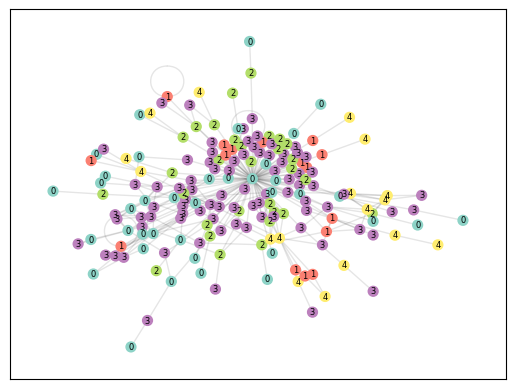

In [24]:
labels = dict(zip(umap_layout.nodes.id, umap_layout.nodes.label))

w=70
nx.draw_networkx_nodes(umap_layout.graph, pos=umap_layout.positions[w], node_size=50, 
                       node_color=umap_layout.nodes['label'], cmap='Set3')
nx.draw_networkx_labels(umap_layout.graph, pos=umap_layout.positions[w], labels=labels, font_size=6)
nx.draw_networkx_edges(umap_layout.graph, pos=umap_layout.positions[w], alpha=0.1)

plt.savefig('./imgs/results/webk/umap{}_398_67.jpg'.format(w))

# node2vec

Reduce features for node2vec

In [7]:
reduced_nodes = nodes.copy(deep=True)
reduced_features = reduced_nodes[feature_names].values
reduced_features = TSNE(n_components=50, learning_rate='auto', init='random',method="exact").fit_transform(reduced_features)

In [8]:
n2v_nodes = reduced_nodes.drop(columns=np.char.add("f", np.arange(50, 1703).astype(str)))
n2v_nodes[np.char.add("f", np.arange(50).astype(str))] = reduced_features
n2v_nodes[np.char.add("f", np.arange(50).astype(str))] = n2v_nodes[np.char.add("f", np.arange(50).astype(str))].round().astype(int)

In [9]:
node2vec_layout = InteractiveLayout(nodes = n2v_nodes, edges = edges, method="node2vec")

Computing transition probabilities:   0%|          | 0/745 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 150/150 [01:07<00:00,  2.23it/s]


In [25]:
node2vec_layout.draw()

interactive(children=(IntSlider(value=50, description='x', max=99), Output()), _dom_classes=('widget-interact'…

<function interactive_layout.InteractiveLayout.draw.<locals>.f(x)>

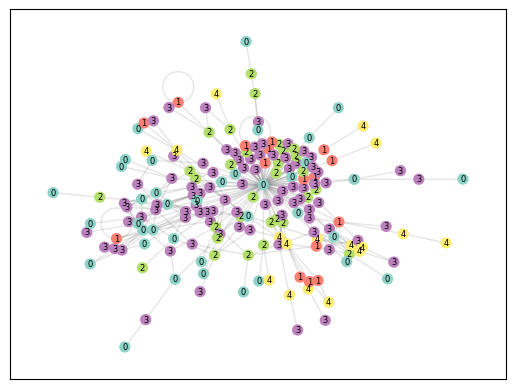

In [29]:
labels = dict(zip(node2vec_layout.nodes.id, node2vec_layout.nodes.label))

w=70
nx.draw_networkx_nodes(node2vec_layout.graph, pos=node2vec_layout.positions[w], node_size=50, 
                       node_color=node2vec_layout.nodes['label'], cmap='Set3')
nx.draw_networkx_labels(node2vec_layout.graph, pos=node2vec_layout.positions[w], labels=labels, font_size=6)
nx.draw_networkx_edges(node2vec_layout.graph, pos=node2vec_layout.positions[w], alpha=0.1)

plt.savefig('./imgs/results/webk/node2vec{}_383_75.jpg'.format(w))

# Baseline FR

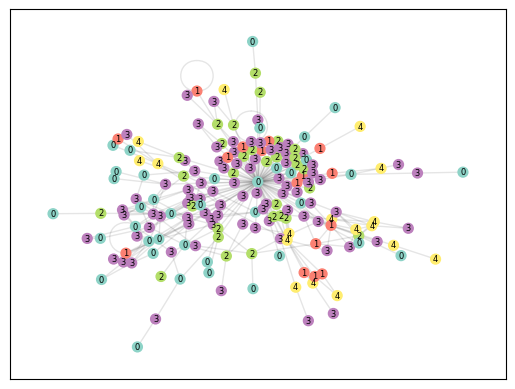

In [3]:
labels = dict(zip(nodes.id, nodes.label))
H = nx.from_pandas_edgelist(edges, 'source', 'target', 'weight')

G = nx.Graph()
G.add_nodes_from(sorted(H.nodes(data=True)))
G.add_edges_from(H.edges(data=True))

nr_nodes = len(G.nodes)
nr_edges = len(G.edges)

np.random.seed(4040)
fr_pos=nx.fruchterman_reingold_layout(G)

nx.draw_networkx_nodes(G, pos=fr_pos, node_size=50, node_color=nodes['label'], 
                 cmap='Set3')
nx.draw_networkx_labels(G, pos=fr_pos, labels=labels, font_size=6)
nx.draw_networkx_edges(G, pos=fr_pos, alpha=0.1)

#plt.savefig('./imgs/results/webk/baseline_fr.jpg')

In [39]:
edge_list = list(G.edges)
get_crossings(fr_pos, nr_edges, edge_list)

340

In [40]:
get_occlusions(fr_pos, nr_nodes)

68

# Force then embed

In [41]:
np.random.seed(4040)
embeddings = TSNE(n_components=2, init=np.array(list(fr_pos.values()))).fit_transform(nodes.drop('id', axis=1))

embedding_pos = {}
for i, name in enumerate(nodes['id']):
    embedding_pos[name] = embeddings[i]

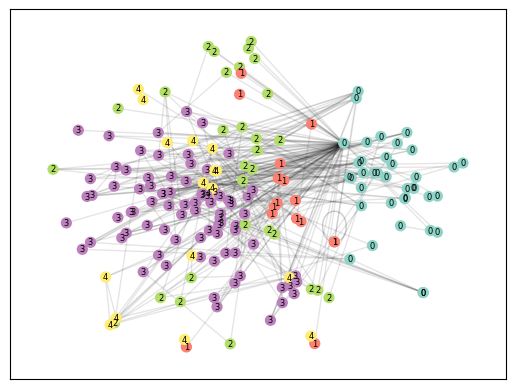

In [42]:
nx.draw_networkx_nodes(G, pos=embedding_pos, node_size=50, node_color=nodes['label'], 
                 cmap='Set3')
nx.draw_networkx_labels(G, pos=embedding_pos, labels=labels, font_size=6)
nx.draw_networkx_edges(G, pos=embedding_pos, alpha=0.1)
plt.savefig('./imgs/results/webk/baseline_fr_embed.jpg')

In [43]:
get_crossings(embedding_pos, nr_edges, edge_list)

9860

In [44]:
get_occlusions(embedding_pos, nr_nodes)

7

# Embed then force

In [45]:
np.random.seed(4040)
embeddings = TSNE(n_components=2, init="random").fit_transform(nodes.drop('id', axis=1))

embedding_pos = {}
for i, name in enumerate(nodes['id']):
    embedding_pos[name] = embeddings[i]

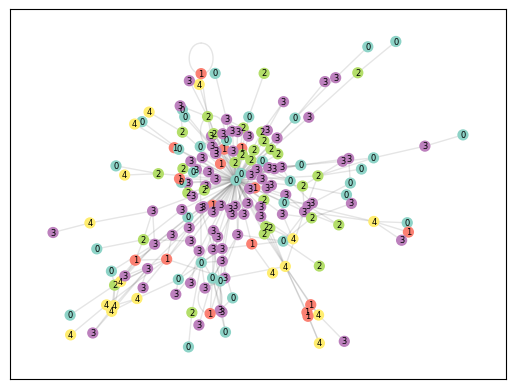

In [46]:
np.random.seed(4040)
pos=nx.fruchterman_reingold_layout(G, pos=embedding_pos, iterations = 50)
nx.draw_networkx_nodes(G, pos=pos, node_size=50, node_color=nodes['label'], 
                 cmap='Set3')
nx.draw_networkx_labels(G, pos=pos, labels=labels, font_size=6)
nx.draw_networkx_edges(G, pos=pos, alpha=0.1)
plt.savefig('./imgs/results/webk/baseline_embed_fr.jpg')

In [47]:
get_crossings(pos, nr_edges, edge_list)

406

In [48]:
get_occlusions(pos, nr_nodes)

95